In [3]:
from sklearn.naive_bayes import GaussianNB

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


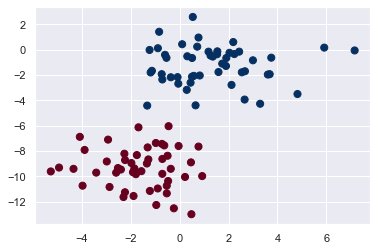

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [4]:
rng=np.random.RandomState(0)


In [5]:
xnew=[-14,12]+[2,-2]*rng.rand(2000,2)

In [6]:
model=GaussianNB()
model.fit(X,y);

In [7]:
ynew=model.predict(xnew)

In [8]:
ynew

array([1, 1, 1, ..., 1, 1, 1])

### Naive-bayes Multinomial

In [9]:
from sklearn.datasets import fetch_20newsgroups

In [10]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
#train = fetch_20newsgroups(subset='train', categories=categories)
#test = fetch_20newsgroups(subset='test', categories=categories)



In [11]:
path_test=r'C:\Users\avira\Downloads\Compressed\20news\20news-bydate-test'
path_train=r'C:\Users\avira\Downloads\Compressed\20news\20news-bydate-train'

In [16]:
import os
import threading

In [13]:
def readfiles(path=os.getcwd()):
    path_files=[ arch.path for arch in os.scandir(path) if arch.is_file()]
    text_list=str()
    for p_file in path_files:
        with open(p_file,'r') as f:
            text_list+=f.read()
    return text_list

In [57]:
def readdir_text(path=os.getcwd(),text_dir=dict()):
    #text_dir=dict()
    for p_dir,name in [(arch.path,arch.name) for arch in os.scandir(path) if arch.is_dir()]:
        text_dir[name]=readfiles(p_dir)
        print(' Thread {0} ->  {1} Leida'.format(threading.currentThread().getName(),name))
    #return text_dir


In [58]:
train,test=dict(),dict()
threadTrain=threading.Thread(target=readdir_text,args=(path_train,train),name='Train')
threadTest=threading.Thread(target=readdir_text,args=(path_test,test),name='Test')
threadTrain.start()
threadTest.start()

threadTrain.join()
threadTest.join()

 Thread Test ->  alt.atheism Leida
 Thread Train ->  alt.atheism Leida
 Thread Test ->  comp.graphics Leida
 Thread Test ->  comp.os.ms-windows.misc Leida
 Thread Train ->  comp.graphics Leida
 Thread Test ->  comp.sys.ibm.pc.hardware Leida
 Thread Test ->  comp.sys.mac.hardware Leida
 Thread Train ->  comp.os.ms-windows.misc Leida
 Thread Test ->  comp.windows.x Leida
 Thread Train ->  comp.sys.ibm.pc.hardware Leida
 Thread Test ->  misc.forsale Leida
 Thread Train ->  comp.sys.mac.hardware Leida
 Thread Test ->  rec.autos Leida
 Thread Test ->  rec.motorcycles Leida
 Thread Train ->  comp.windows.x Leida
 Thread Test ->  rec.sport.baseball Leida
 Thread Train ->  misc.forsale Leida
 Thread Test ->  rec.sport.hockey Leida
 Thread Test ->  sci.crypt Leida
 Thread Train ->  rec.autos Leida
 Thread Test ->  sci.electronics Leida
 Thread Train ->  rec.motorcycles Leida
 Thread Test ->  sci.med Leida
 Thread Test ->  sci.space Leida
 Thread Train ->  rec.sport.baseball Leida
 Thread Test -

In [59]:
print(train['sci.med'])

From: bed@intacc.uucp (Deb Waddington)
Subject: INFO NEEDED: Gaucher's Disease
Distribution: Everywhere
Expires: 01 Jun 93
Reply-To: bed@intacc.UUCP (Deb Waddington)
Organization: Matrix Artists' Network
Lines: 33


I have a 42 yr old male friend, misdiagnosed as having
 osteopporosis for two years, who recently found out that his
 illness is the rare Gaucher's disease. 

Gaucher's disease symptoms include: brittle bones (he lost 9 
 inches off his hieght); enlarged liver and spleen; internal
 bleeding; and fatigue (all the time). The problem (in Type 1) is
 attributed to a genetic mutation where there is a lack of the
 enzyme glucocerebroside in macrophages so the cells swell up.
 This will eventually cause death.

Enyzme replacement therapy has been successfully developed and
 approved by the FDA in the last few years so that those patients
 administered with this drug (called Ceredase) report a remarkable
 improvement in their condition. Ceredase, which is manufactured
 by biotech b

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [61]:
model =make_pipeline(TfidfVectorizer(),MultinomialNB())

In [62]:
train_data=list(train.values())
train_target=list(train.keys())

In [63]:
test_data=list(test.values())
test_target=list(test.keys())

In [64]:
model.fit(train_data,train_target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [65]:
model.predict(['this hardware having too many components'])[0]

'comp.sys.mac.hardware'